# Laser Spectroscopy Lab Notebook

## Group Chat:

Ben, tomorrow, I suggest you first try to replicate what work we did tonight.  Try to see if you can pull 6 peaks as well.  If you can do that, then we need to download the data onto a USB.  I recommend pulling one of the nice TekTronix oscilloscopes from the electronics lab outside the room, and try to get one with a USB.  I think the one on the far right end has what we are looking for.
* Fire up the laser.  Wait at least 20 minutes for the bitch to stabilize its temperature.  Maybe do this first thing when you get in so it can be warming up while you do the Error Analysis assignment with Jun.
* While you are waiting (or once you are done with the assignment), grab the oscilloscope and turn on both it and the function generator.
* Input the settings mentioned below
* Do science

I think we need to get a solid dataset before we start the interferometry.  One of the critical steps is to do what is mentioned in the instructions in all caps.  I think we need to use some cursors to determine what the timescale is on the oscilloscope so we can convert from time to frequency after we do the Michelson-Morely interferometer thingy.  But we need this data first!  You might want to ask Jun for clarification on what the instructions mean, as I am a little confused.

Let me know if you have any issues.  I will have my phone on me most the day.  Good luck!

Turn on laser
Set current to 60.0 mA
Set piezo voltage to 59.5ish V (voltage oscillates)

Turn on function generator
Plug in Oscilloscope to FG
Test triangle function on scope:  We noticed there is a 20db Voltage gain between our inputs and the oscilloscope reading, so we adjusted the inputs on the oscilloscope from 10x to 1x: CH2 -> 1x

**FG Settings:**

Ramp wave

500 mHz

4.0 Vpp

**Laser Settings:**

~~111.8 V~~ Set to 100.0 V, but autoadjusts to 100.8 V

~~60 mA~~ 60.0 mA

Note:  Higher frequencies can oscillate the piezo enough to generate sound!

Signal splitter from FG output: 1 to Oscilloscope, 1 to Laser Diode

We tried following the method mentioned in the Vortex Users guide: start at piezo voltage 59 V, set input voltage to a max of 4.5 Vpp.  However, we were unable to see any fluorescence at these settings.

Adjusted baseline piezo voltage and set oscillation voltage to 0.  We then scanned the piezo voltage spectrum until we found two "Intensity peaks": One at 109.3 V and the other at 113.8 V. I wonder if these are the ${}^{87}Rb \quad F=1 \rightarrow F'=1,2,3$ and the ${}^{85}Rb \quad F=3 \rightarrow F'=2,3,4$ transitions so close together (and mentioned in the lab manual).

88.8 Turning on
90.5 Peak
91.7 trough
93.2 Peak
94.1 Turning off
96.9 Turning on
98.1 Peak
99.0 Turned off
101.3 Turning on
103.6 Turning off

### 31 Jan:
Vortex Laser head would not fire up.  After $\approx$ 45 minutes, the controller still read that the temperature was unstable.  Replaced with different head and realigned beams.

**Current Settings**

Laser: 
* Piezo Voltage: 90.2 V
* Current: 60.0 mA

Function Generator:
* Ramp
* Frequency: 20 Hz
* Amplitude: 5.5 Vpp
* Offset: 0.0 VDC

Oscilloscope:
* Channel 1: Beam 1
* Channel 2: Beam 2 (blocked for calibration
* EXT Trig: Function Generator
* V Scale: 50.0 mV
* T Scale: 100.0 $\mu s$
* Both Channels: 
    * Coupling: DC
    * BW Limit: ON
    * Probe: 1x
    * Invert: ON
* Trigger Menu:
    * Mode: Edge
    * Source: Ext
    * Slope: RightDownRight
    * Sweep: Auto
    * Coupling: DC
    
<img src='6peaks.jpg'>


Laser voltage 91.9
current 60.0 mA

Triangle Wave
20 Hz
1-3 VPP

Turn on laser key, allow $\approx$ 20 minutes to warm up before turning on beam
Turn on Waveform Generator
Turn on Photodetectors

Adjust settings to those mentioned in previous block.
Invert all plots
Go for AC setting

Use laser voltage to shift plot L/R
Once on 87Rb Peak (smaller one on right) adjust waveform generator frequency and Vpp amplitude voltage until signals become clear.

To generate solid looking plot, go to aquire and set averages

Qs:
Use Trigger Edge, but see about setting differnent direction choices


In [5]:
%matplotlib inline
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erf,erfc
from scipy.optimize import curve_fit

plt.style.use('ggplot')

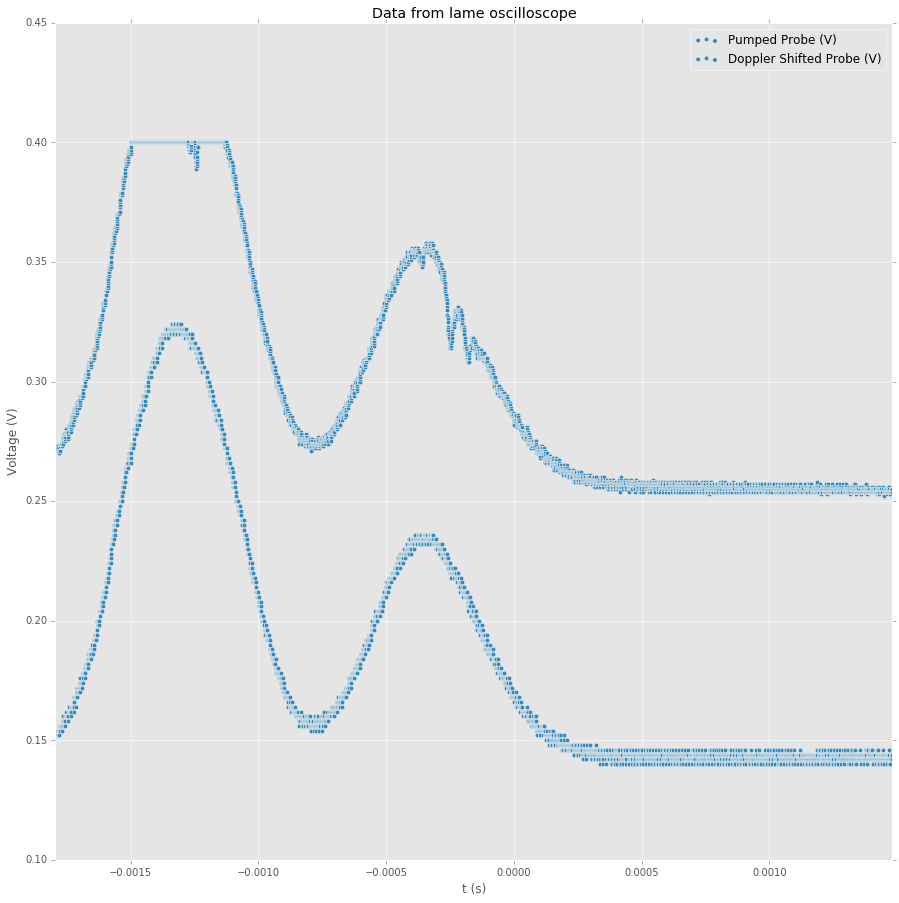

In [6]:
data = pd.DataFrame(pd.read_csv('NewFile0.csv'))
#data1 = pd.read_csv('/home/bjorn/Documents/CU/PHYS_4430/Test_Profile_Data.csv', index_col='Position (m)')

data1 = data[:]
del data1['Unnamed: 3']
data1 = data1.drop(0)
# xa = np.array(float(data1['X']))
# y1 = np.array(data['CH1'])
# y2 = np.array(data['CH2'])

data1=data1.astype('float')
data1['CH1'] = data1['CH1']*-1
data1['CH2'] = data1['CH2']*-1
data1 = data1.rename(columns={'X':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Shifted Probe (V)'})


fig = plt.figure()
ax = plt.subplot(111)
plt.figure(figsize=(12,15))
data1.plot(kind = 'scatter',x='t (s)', y='Pumped Probe (V)',style = 'b.', ax = ax, label = 'Pumped Probe (V)')
data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler Shifted Probe (V)', style = 'b.',  ax = ax, label = 'Doppler Shifted Probe (V)')
ax.set_xlim(data1['t (s)'].min(), data1['t (s)'].max())
ax.set(ylabel='Voltage (V)')
ax.legend(loc='best')
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_title('Data from lame oscilloscope')

plt.show()


Questions:

How much of an overlap betweeen the first probe beam and the pump beam is required?  How close can the pump beam get to the second probe beam?



In [7]:
print((113.8+109.8)/2)
print(113.9-111.8)
print(111.8-109.8)

111.8
2.1000000000000085
2.0


#### Change Log

31 Jan:  Had to swap out Laser head.  After $\approx$ 45 minutes, head was still not temperature stable.  Adjusted laser settings accordingly.

#### Helpful Links
Rigol Function Generator http://pmaweb.caltech.edu/~phy003/DG1022_UserGuide_EN.pdf

Rigol Oscilloscope https://cdn-shop.adafruit.com/datasheets/Users+Guide+DS1000E.pdf
